# Описание задачи
Многие знают про маркетплейсы где продаются б/у вещи, на которых есть возможность недорого купить качественную и полезную вещь. Но всегда волнует вопрос - кто и как устанавливает цену, и какие его характеристики больше всего влияют на итоговую стоимость продажи?! Вопрос становиться особо актуальным, если речь идет про дорогие товары, например про автомобили!
Предлагаем вам принять участие в Мастерской, в рамках которой вы сможете поработать с данными о продажах автомобилей на вторичном рынке. Целью вашего проекта будет разработанная модель предсказания стоимости автомобиля на вторичном рынке.

## Описание данных
В этом конкурсе ваша задача - разработать модель для предсказания стоимости продажи автомобиля на вторичном рынке.

### Данные
* train.csv - информация о продажах (~440000) автомобилей с аукционов, которые будут использоваться в качестве обучающих данных.
* test.csv - информация о продажах (~110000) автомобилей с аукционов, которые будут использоваться в качестве тестовых данных. Ваша задача - предсказать значение 'sellingprice' для каждого автомобиля из этого датасета.
* sample_submission.csv - файл предсказаний в правильном формате.
* vin - идентификатор каждого автомобиля в тестовом наборе.
* sellingprice - Целевой признак. Для каждого автомобиля предскажите числовое значение стоимости автомобиля.

### Описание полей данных
* 'year' - год производства
* 'make' - производитель
* 'model' - модель
* 'trim' - модификация
* 'body' - тип кузова
* 'transmission' - тип КПП
* 'vin' - идентификатор (вин)
* 'state' - штат регистрации
* 'condition' - состояние по шкале (1-5)
* 'odometer' - пробег в милях
* 'color' - цвет кузова
* 'interior' - цвет интерьера
* 'seller' - продавец
* 'sellingprice' - стоимость продажи
* 'saledate' - дата продажи

# Загрузка и ознакомление с данными

Установка дополнительных библиотек

In [1]:
!pip install catboost
!pip install phik
!pip install seaborn
!pip install scikit-learn

In [2]:
import pandas as pd
from catboost import CatBoostRegressor, Pool
import phik
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
UNKNOWN = 'UNKNOWN'
RANDOM_STATE = 1234

In [4]:
try:
    df = pd.read_csv('../input/used-cars-price-prediction/train.csv')
    df_test = pd.read_csv('../input/used-cars-price-prediction/test.csv')
except:
    df = pd.read_csv('train.csv')
    df_test = pd.read_csv('test.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440236 entries, 0 to 440235
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          440236 non-null  int64  
 1   make          432193 non-null  object 
 2   model         432113 non-null  object 
 3   trim          431899 non-null  object 
 4   body          429843 non-null  object 
 5   transmission  388775 non-null  object 
 6   vin           440236 non-null  object 
 7   state         440236 non-null  object 
 8   condition     430831 non-null  float64
 9   odometer      440167 non-null  float64
 10  color         439650 non-null  object 
 11  interior      439650 non-null  object 
 12  seller        440236 non-null  object 
 13  sellingprice  440236 non-null  int64  
 14  saledate      440236 non-null  object 
dtypes: float64(2), int64(2), object(11)
memory usage: 50.4+ MB


In [6]:
df.head(10)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
0,2011,Ford,Edge,SEL,suv,automatic,2fmdk3jc4bba41556,md,4.2,111041.0,black,black,santander consumer,12500,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Ford,Fusion,SE,Sedan,automatic,3fa6p0h75er208976,mo,3.5,31034.0,black,black,ars/avis budget group,14500,Wed Feb 25 2015 02:00:00 GMT-0800 (PST)
2,2012,Nissan,Sentra,2.0 SL,sedan,automatic,3n1ab6ap4cl698412,nj,2.2,35619.0,black,black,nissan-infiniti lt,9100,Wed Jun 10 2015 02:30:00 GMT-0700 (PDT)
3,2003,HUMMER,H2,Base,suv,automatic,5grgn23u93h101360,tx,2.8,131301.0,gold,beige,wichita falls ford lin inc,13300,Wed Jun 17 2015 03:00:00 GMT-0700 (PDT)
4,2007,Ford,Fusion,SEL,Sedan,automatic,3fahp08z17r268380,md,2.0,127709.0,black,black,purple heart,1300,Tue Feb 03 2015 04:00:00 GMT-0800 (PST)
5,2013,Lincoln,MKZ,Base,Sedan,automatic,3ln6l2j91dr817800,mi,2.5,14894.0,black,black,"ford motor credit company,llc",22600,Thu May 21 2015 02:00:00 GMT-0700 (PDT)
6,2010,pontiac,g6,4c,NaN,automatic,1g2za5eb4a4157380,nc,3.4,114587.0,silver,black,north state acceptance,5900,Mon Jan 12 2015 09:30:00 GMT-0800 (PST)
7,2013,Ford,Escape,SE,SUV,automatic,1fmcu0gx3duc59421,fl,4.8,26273.0,blue,gray,fields bmw,15200,Tue Feb 03 2015 01:00:00 GMT-0800 (PST)
8,2000,Hyundai,Elantra,GLS,Sedan,automatic,kmhjf35f2yu955691,oh,1.9,182624.0,black,tan,dt inventory,700,Thu Jan 22 2015 01:00:00 GMT-0800 (PST)
9,2005,Ford,Freestyle,Limited,wagon,automatic,1fmdk06135ga45438,oh,1.0,149364.0,black,tan,wells fargo dealer services,325,Tue Jun 16 2015 05:00:00 GMT-0700 (PDT)


In [7]:
df.describe()

,year,condition,odometer,sellingprice
count,440236.000000,430831.000000,440167.000000,440236.000000
mean,2010.040101,3.425077,68344.421604,13592.209588
std,3.977945,0.949973,53542.203908,9751.479098
min,1982.000000,1.000000,1.000000,1.000000
25%,2007.000000,2.700000,28258.000000,6900.000000
50%,2012.000000,3.600000,52098.000000,12100.000000
75%,2013.000000,4.200000,99272.000000,18200.000000
max,2015.000000,5.000000,999999.000000,230000.000000


In [8]:
df.duplicated().sum()

0

В данных много категориальных признаков. Наблюдается много пропусков для признака transmission. В остальных категориальных признаках можно заменить пропуски на значение UNKNOWN. Также все значения приведем к нижнему регистру. Признак datetime преобразуем к дате.

# Разведочный анализ

## Целевой признак

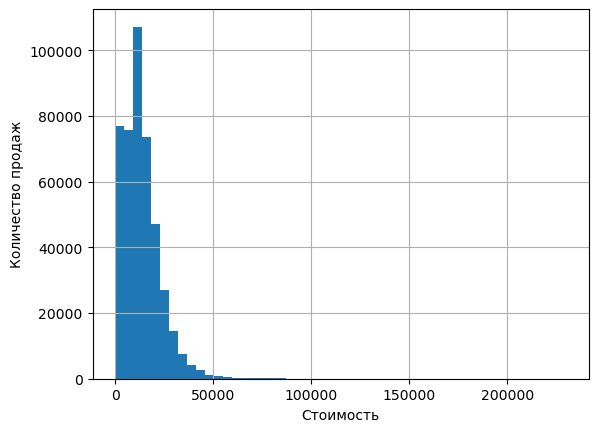

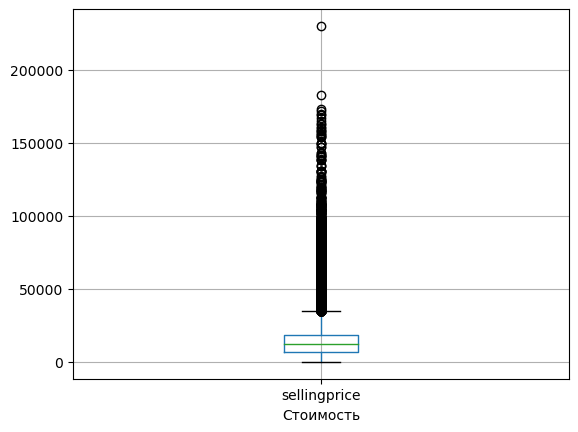

In [9]:
df['sellingprice'].hist(bins=50)
plt.xlabel('Стоимость')
plt.ylabel('Количество продаж')
plt.show()
df.boxplot('sellingprice')
plt.xlabel('Стоимость')
plt.show()

In [10]:
print(df['sellingprice'].quantile(0.25), df['sellingprice'].quantile(0.75))

6900.0 18200.0


Основная доля авто продается по цене в диапазона 7000-18000$. С ростом цены падает и число продаваемых авто

## Числовые признаки

### saledate

Сразу выделим из даты продажи различные составляющие

In [11]:
df['saledate_dt'] = pd.to_datetime(df['saledate'], utc=True)
df_test['saledate_dt'] = pd.to_datetime(df_test['saledate'], utc=True)

df['sale_year'] = df['saledate_dt'].dt.year
df_test['sale_year'] = df_test['saledate_dt'].dt.year

df['sale_month'] = df['saledate_dt'].dt.month
df_test['sale_month'] = df_test['saledate_dt'].dt.month

df["sale_yearday"] = df["saledate_dt"].dt.dayofyear
df_test["sale_yearday"] = df_test["saledate_dt"].dt.dayofyear

df["sale_weekday"] = df["saledate_dt"].dt.dayofweek
df_test["sale_weekday"] = df_test["saledate_dt"].dt.dayofweek

df["sale_day"] = df["saledate_dt"].dt.day
df_test["sale_day"] = df_test["saledate_dt"].dt.day

#### sale_year

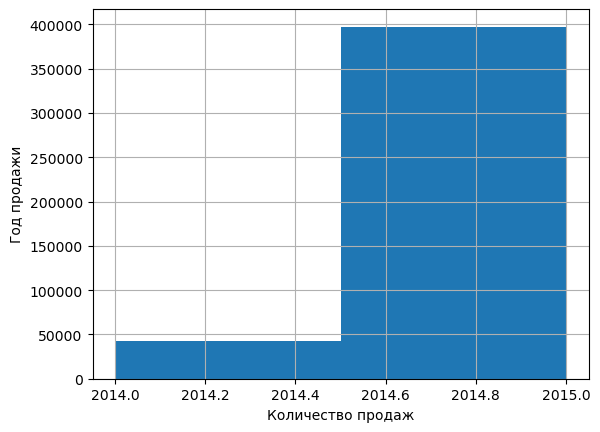

2015    397318
2014     42918
Name: sale_year, dtype: int64

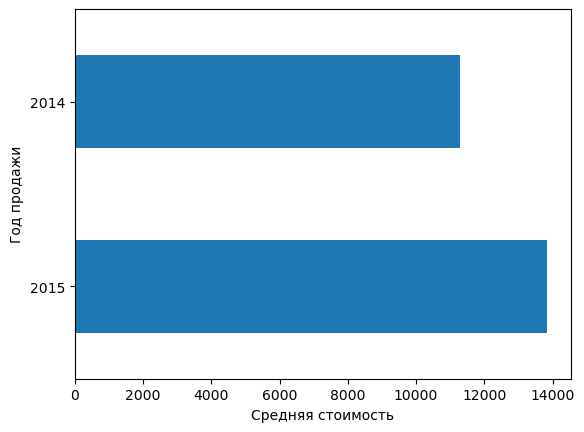

In [12]:
df['sale_year'].hist(bins=2)
plt.xlabel('Количество продаж')
plt.ylabel('Год продажи')
plt.show()
display(df['sale_year'].value_counts())

df.groupby('sale_year')['sellingprice'].agg(['count', 'mean']).sort_values('count', ascending=False)['mean'].plot.barh()
plt.xlabel('Средняя стоимость')
plt.ylabel('Год продажи')
plt.show()

В датасете в основном представленые продажи за 2015 год и немного за 2014. Видно что за год средняя стоимость увеличилась

#### sale_month

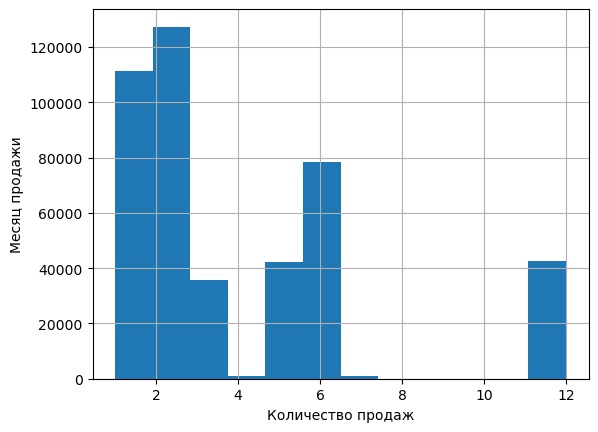

2     127375
1     111510
6      78519
12     42753
5      42108
3      35845
4       1138
7        988
Name: sale_month, dtype: int64

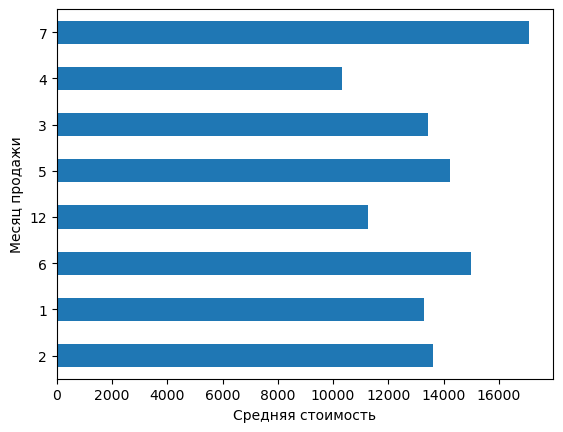

In [13]:
df['sale_month'].hist(bins=12)
plt.xlabel('Количество продаж')
plt.ylabel('Месяц продажи')
plt.show()
display(df['sale_month'].value_counts())

df.groupby('sale_month')['sellingprice'].agg(['count', 'mean']).sort_values('count', ascending=False)['mean'].plot.barh()
plt.xlabel('Средняя стоимость')
plt.ylabel('Месяц продажи')
plt.show()

За некоторые месяцы вобще нет данных, некотрые месяцы взяты только из одного года, не очень показательный признак

#### sale_yearday

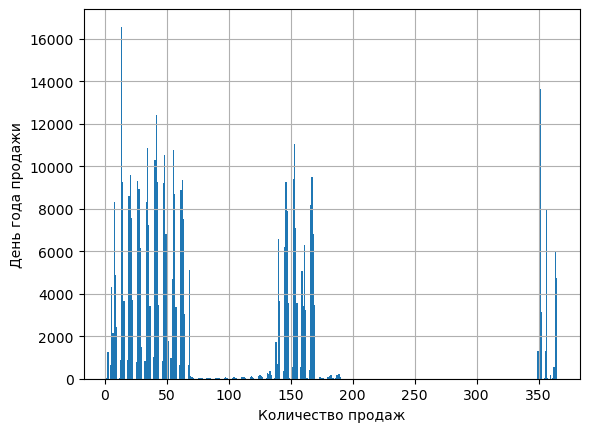

13     16578
352    13626
41     12433
153    11048
34     10857
       ...  
95         3
74         3
135        2
121        1
201        1
Name: sale_yearday, Length: 163, dtype: int64

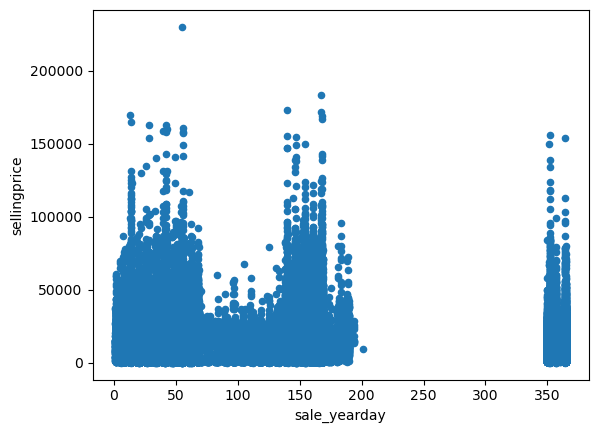

In [14]:
df['sale_yearday'].hist(bins=365)
plt.xlabel('Количество продаж')
plt.ylabel('День года продажи')
plt.show()
display(df['sale_yearday'].value_counts())
df.plot.scatter('sale_yearday', 'sellingprice')
plt.show()

С днем года таже ситуация, что и с месяцем - признак не очень показательный

#### sale_weekday

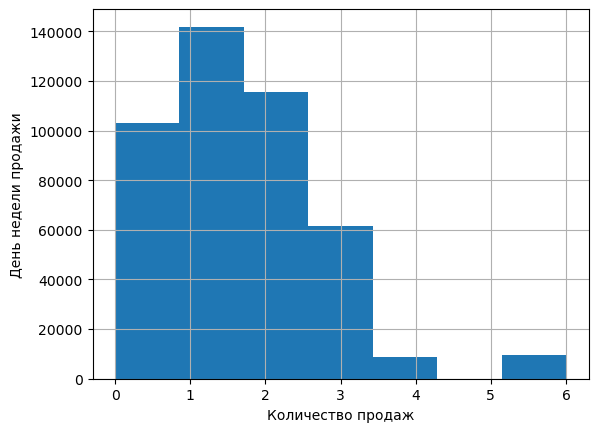

1    141848
2    115499
0    103201
3     61419
6      9420
4      8849
Name: sale_weekday, dtype: int64

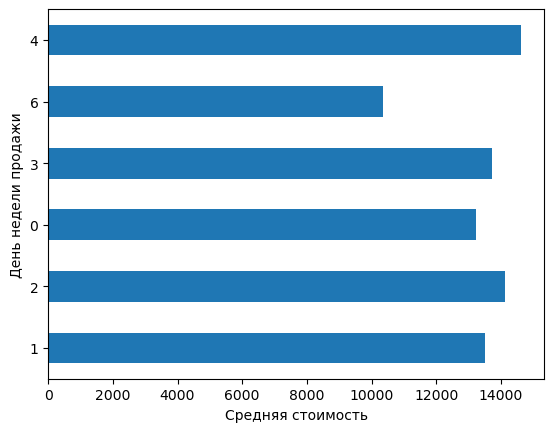

In [15]:
df['sale_weekday'].hist(bins=7)
plt.xlabel('Количество продаж')
plt.ylabel('День недели продажи')
plt.show()
display(df['sale_weekday'].value_counts())

df.groupby('sale_weekday')['sellingprice'].agg(['count', 'mean']).sort_values('count', ascending=False)['mean'].plot.barh()
plt.xlabel('Средняя стоимость')
plt.ylabel('День недели продажи')
plt.show()

Интересно что по субботам нет продаж вообще, видимо выходной, а в воскресенье средняя стоимость продажи минимальна

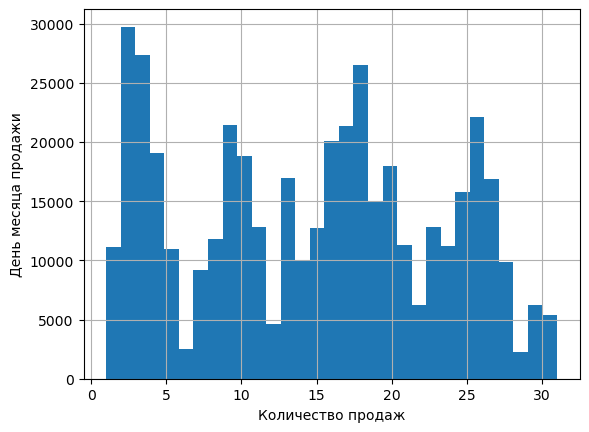

2     29736
3     27339
18    26535
26    22117
9     21427
17    21339
16    20110
4     19105
10    18832
20    18009
13    16996
27    16881
25    15774
19    14946
11    12837
23    12803
15    12748
8     11834
21    11328
24    11246
1     11159
5     11000
14     9932
28     9833
7      9182
30     6210
22     6207
31     5372
12     4609
6      2541
29     2249
Name: sale_day, dtype: int64

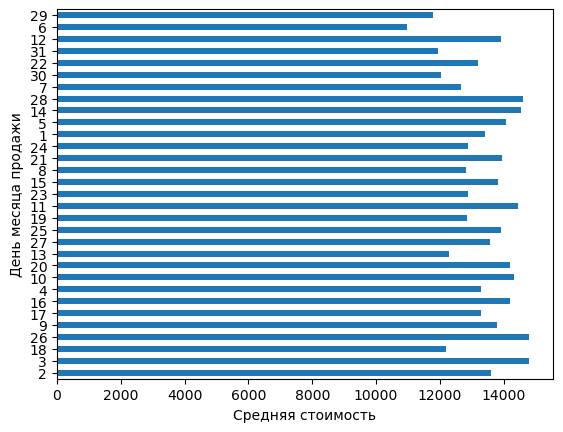

In [16]:
df['sale_day'].hist(bins=31)
plt.xlabel('Количество продаж')
plt.ylabel('День месяца продажи')
plt.show()
display(df['sale_day'].value_counts())

df.groupby('sale_day')['sellingprice'].agg(['count', 'mean']).sort_values('count', ascending=False)['mean'].plot.barh()
plt.xlabel('Средняя стоимость')
plt.ylabel('День месяца продажи')
plt.show()

Количество продаж интересно распределно по дням месяца, есть 4 отдельных пика, средняя стоимость отличается в зависимости от дня

### Year

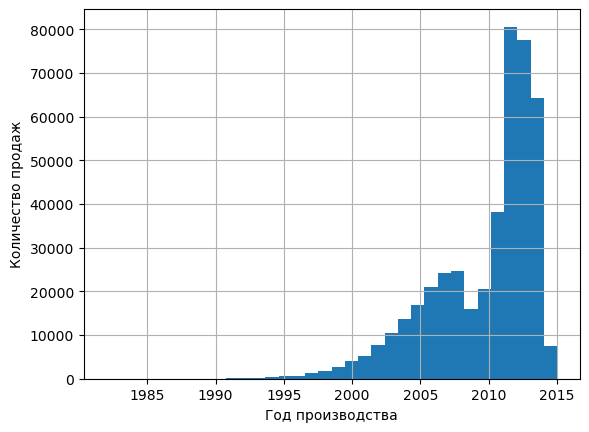

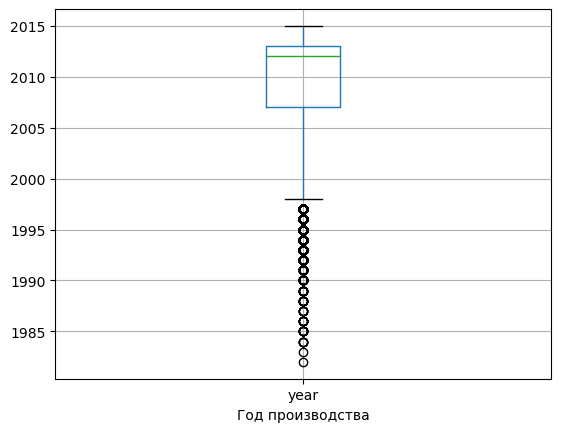

In [17]:
df['year'].hist(bins=len(df['year'].unique()))
plt.xlabel('Год производства')
plt.ylabel('Количество продаж')
plt.show()
df.boxplot('year')
plt.xlabel('Год производства')
plt.show()

In [18]:
df['year'].value_counts()

2012    80625
2013    77566
2014    64225
2011    38115
2008    24646
2007    24152
2006    21118
2010    20647
2005    16794
2009    16064
2004    13658
2003    10512
2002     7726
2015     7462
2001     5147
2000     4161
1999     2658
1998     1747
1997     1224
1996      683
1995      567
1994      319
1993      168
1992      103
1991       56
1990       38
1989       15
1988       11
1985       10
1986        8
1987        5
1984        4
1983        1
1982        1
Name: year, dtype: int64

В датасете представленны продажи за 2014-2015 год, основную долю продаж занимают машины 2011-2014 года производства, то есть 2-5 летнего возраста. Есть провал в продажах авто 2009-2010 года производства, возможно это последствия кризиса

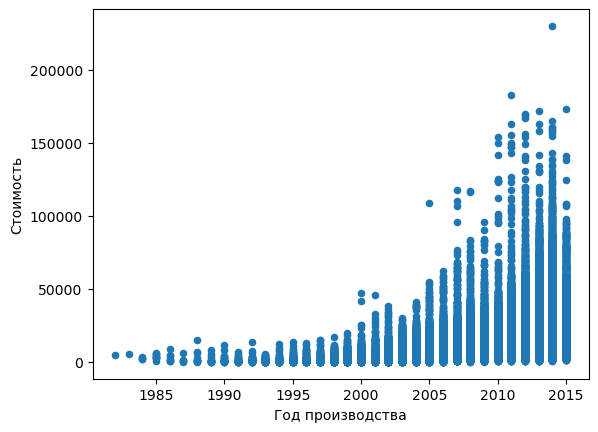

In [19]:
df.plot.scatter('year', 'sellingprice')
plt.xlabel('Год производства')
plt.ylabel('Стоимость')
plt.show()

Между годом производства и ценой наблюдается зависимость, чем машина старше, тем ниже максимальная стоимость

### Condition

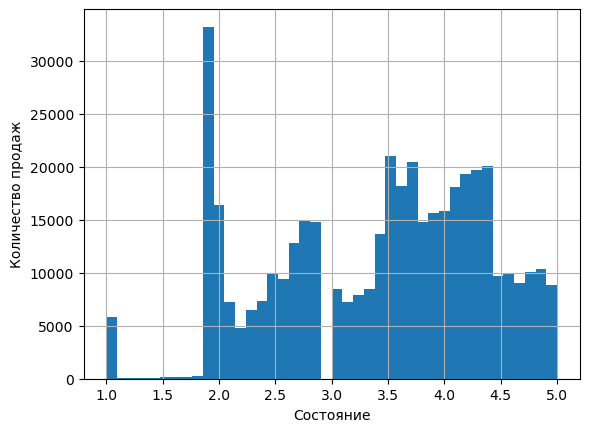

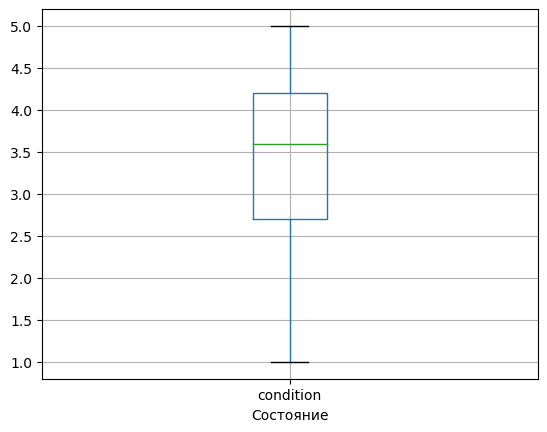

In [20]:
df['condition'].hist(bins=len(df['condition'].unique()))
plt.xlabel('Состояние')
plt.ylabel('Количество продаж')
plt.show()
df.boxplot('condition')
plt.xlabel('Состояние')
plt.show()

Интересное наблюдение, что практически нет машин с состоянием между 1.1 и 1.8, или машина оценена максимально низко в 1 или уже начиная от 1.9

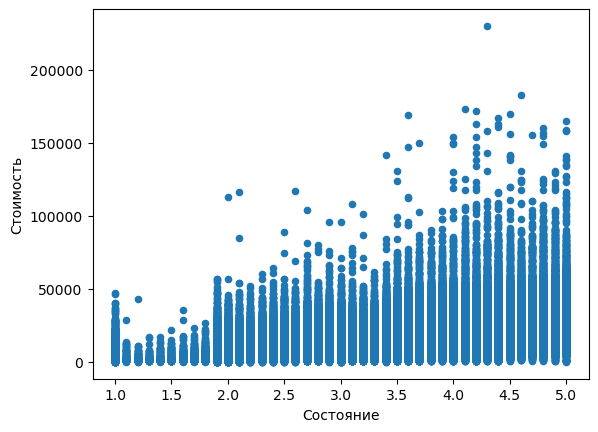

In [21]:
df.plot.scatter('condition', 'sellingprice')
plt.xlabel('Состояние')
plt.ylabel('Стоимость')
plt.show()

Между состоянием и ценой наблюдается небольшая зависимость, чем состояние хуже, тем  меньше максимальная стоимость

### Odometer

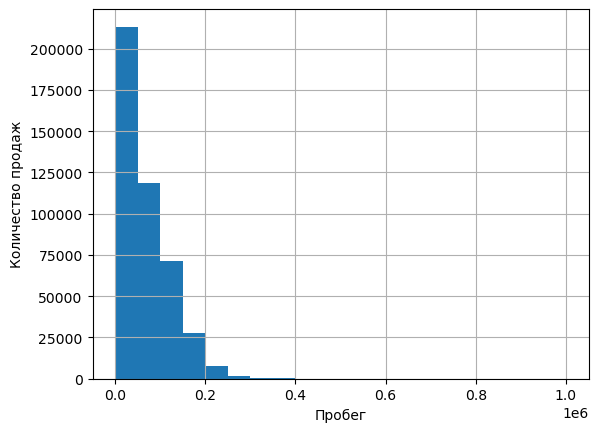

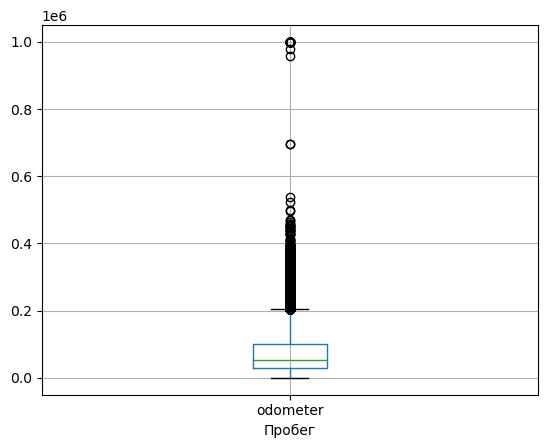

In [22]:
df['odometer'].hist(bins=20)
plt.xlabel('Пробег')
plt.ylabel('Количество продаж')
plt.show()
plt.xlabel('Пробег')
df.boxplot('odometer')
plt.show()

In [23]:
print(df['odometer'].quantile(0.25), df['odometer'].quantile(0.75))

28258.0 99272.0


Основная доля продаж у машин с пробегом 28000-100000 миль

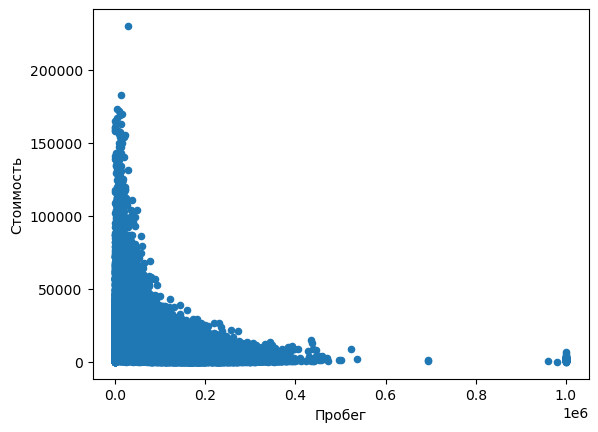

In [24]:
df.plot.scatter('odometer', 'sellingprice')
plt.xlabel('Пробег')
plt.ylabel('Стоимость')
plt.show()

Наблюдается резкое снижение максимальной стоимости с ростом пробега

## Категориальные признаки

Категориальные признаки сразу приведем к нижнему регистру

In [25]:
for column in ['make','model', 'trim', 'body', 'transmission', 'state', 'color', 'interior', 'seller']:
    df[column] = df[column].str.lower()
    df_test[column] = df_test[column].str.lower()

### Make

In [26]:
df['make'].unique()

array(['ford', 'nissan', 'hummer', 'lincoln', 'pontiac', 'hyundai', nan,
       'buick', 'chevrolet', 'honda', 'acura', 'cadillac', 'gmc', 'saab',
       'dodge', 'mercedes-benz', 'toyota', 'volkswagen', 'bmw',
       'infiniti', 'chrysler', 'kia', 'jaguar', 'subaru', 'jeep', 'lexus',
       'mercedes', 'scion', 'fiat', 'suzuki', 'mazda', 'volvo', 'audi',
       'mini', 'isuzu', 'mitsubishi', 'smart', 'porsche', 'land rover',
       'saturn', 'ram', 'oldsmobile', 'mercury', 'bentley', 'fisker',
       'maserati', 'tesla', 'landrover', 'vw', 'gmc truck', 'rolls-royce',
       'ferrari', 'plymouth', 'lamborghini', 'geo', 'ford truck',
       'aston martin', 'daewoo', 'mercedes-b', 'dodge tk', 'mazda tk',
       'dot', 'airstream'], dtype=object)

In [27]:
len(df['make'].unique())

63

Представлено 63 производителя

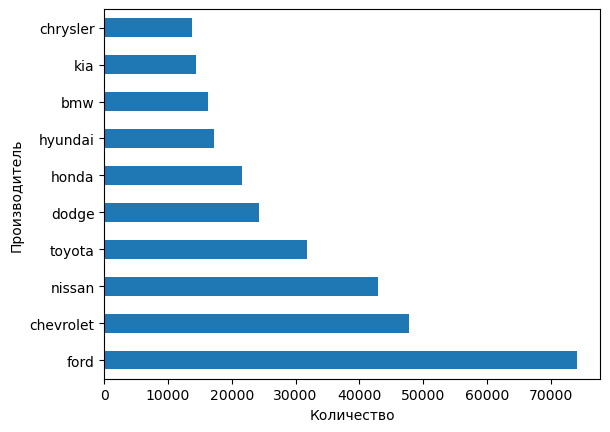

ford         74067
chevrolet    47818
nissan       42866
toyota       31711
dodge        24294
honda        21600
hyundai      17187
bmw          16254
kia          14325
chrysler     13796
Name: make, dtype: int64

In [28]:
df['make'].value_counts()[:10].plot.barh()
plt.xlabel('Количество')
plt.ylabel('Производитель')
plt.show()
df['make'].value_counts()[:10]

Топ 10 производителей, по числу продаж - 
* ford         74067
* chevrolet    47818
* nissan       42866
* toyota       31711
* dodge        24294
* honda        21600
* hyundai      17187
* bmw          16254
* kia          14325
* chrysler     13796

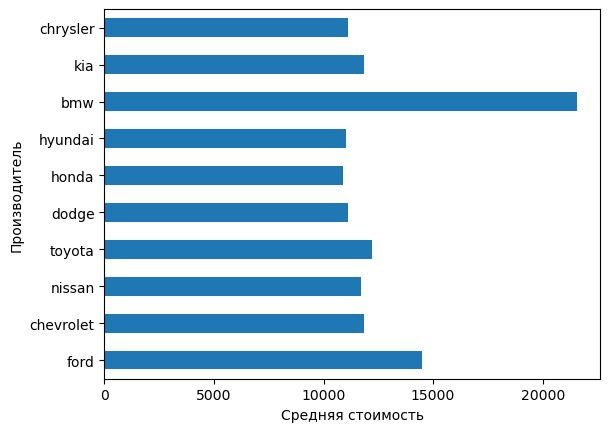

In [29]:
df.groupby('make')['sellingprice'].agg(['count', 'mean']).sort_values('count', ascending=False)[:10]['mean'].plot.barh()
plt.xlabel('Средняя стоимость')
plt.ylabel('Производитель')
plt.show()

Среди топ 10 производителей наблюдаетcя почти одинакова средняя цена, чуть дороже продаются Ford и заметно дороже BMW

### Model

In [30]:
len(df['model'].unique())

840

Представлено 840 моделей авто

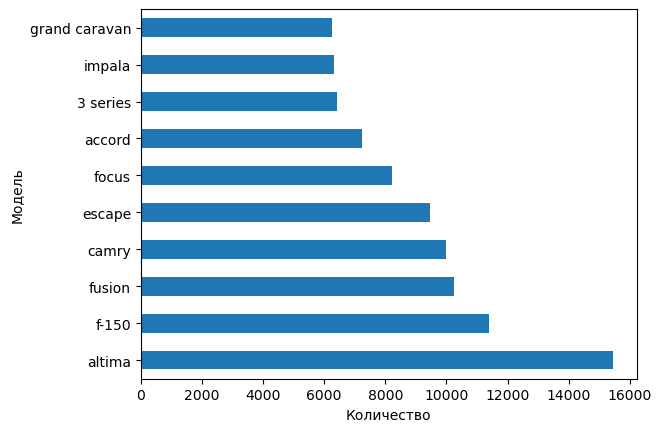

altima           15454
f-150            11408
fusion           10244
camry            10000
escape            9447
focus             8222
accord            7226
3 series          6406
impala            6305
grand caravan     6258
Name: model, dtype: int64

In [31]:
df['model'].value_counts()[:10].plot.barh()
plt.xlabel('Количество')
plt.ylabel('Модель')
plt.show()
df['model'].value_counts()[:10]

Топ 10 моделей по числу продаж
* altima           15454
* f-150            11408
* fusion           10244
* camry            10000
* escape            9447
* focus             8222
* accord            7226
* 3 series          6406
* impala            6305
* grand caravan     6258

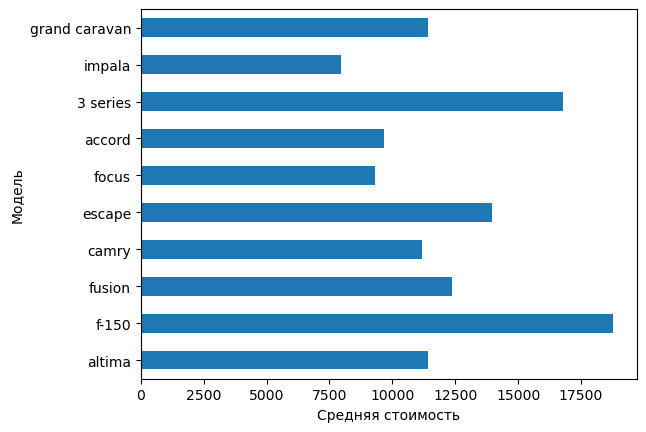

In [32]:
df.groupby('model')['sellingprice'].agg(['count', 'mean']).sort_values('count', ascending=False)[:10]['mean'].plot.barh()
plt.xlabel('Средняя стоимость')
plt.ylabel('Модель')
plt.show()

Цена значительно меняется в зависимости от модели

### Trim

In [33]:
len(df['trim'].unique())

1851

Очень много различных модификаций

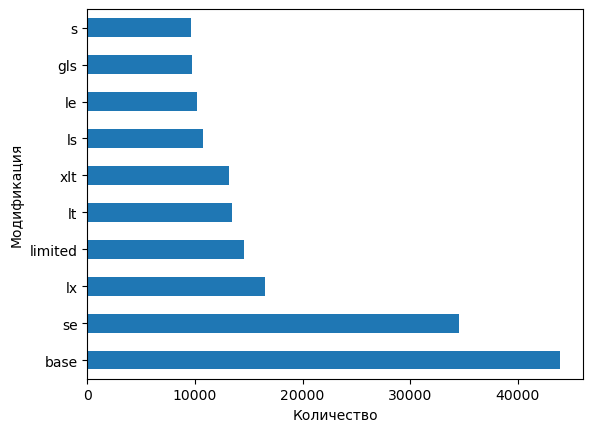

base       43876
se         34498
lx         16511
limited    14516
lt         13431
xlt        13173
ls         10723
le         10231
gls         9707
s           9649
Name: trim, dtype: int64

In [34]:
df['trim'].value_counts()[:10].plot.barh()
plt.xlabel('Количество')
plt.ylabel('Модификация')
plt.show()
df['trim'].value_counts()[:10]

В основном продаются базовые модификации, также есть общеиспользуемые для большинства авто модификации

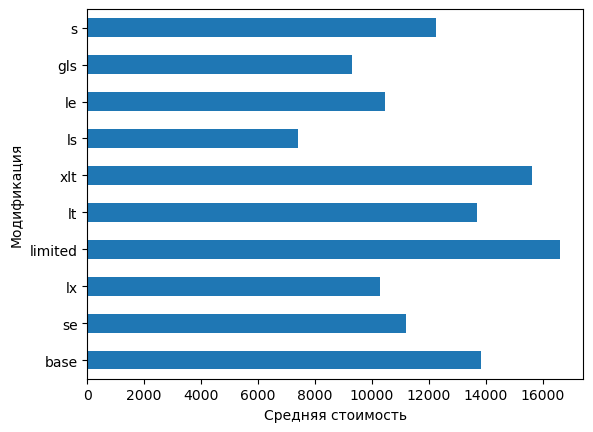

In [35]:
df.groupby('trim')['sellingprice'].agg(['count', 'mean']).sort_values('count', ascending=False)[:10]['mean'].plot.barh()
plt.xlabel('Средняя стоимость')
plt.ylabel('Модификация')
plt.show()

Модификация влияет на цену, особенно ценятся ограниченные модификации

### Body

In [36]:
len(df['body'].unique())

46

Представлено 46 типа кузова

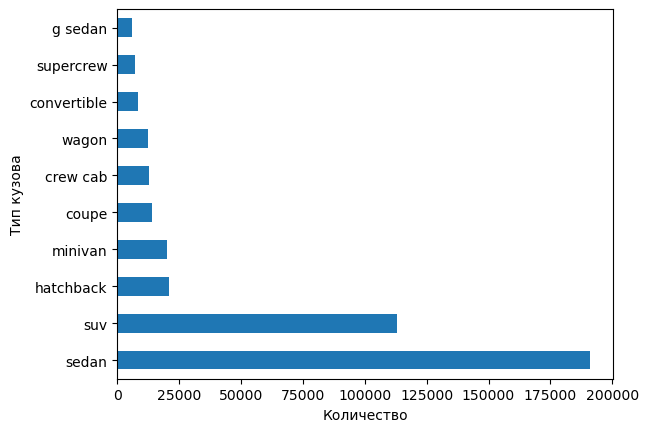

sedan          190861
suv            113042
hatchback       20715
minivan         20114
coupe           13896
crew cab        12823
wagon           12600
convertible      8183
supercrew        7081
g sedan          5859
Name: body, dtype: int64

In [37]:
df['body'].value_counts()[:10].plot.barh()
plt.xlabel('Количество')
plt.ylabel('Тип кузова')
plt.show()
df['body'].value_counts()[:10]

За седанами и внедорожниками основная доля рынка

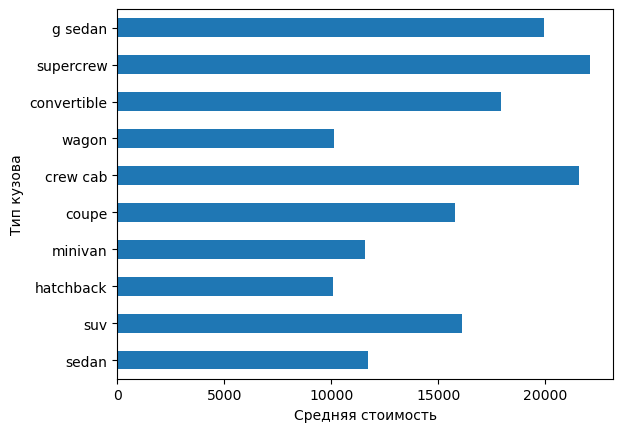

In [38]:
df.groupby('body')['sellingprice'].agg(['count', 'mean']).sort_values('count', ascending=False)[:10]['mean'].plot.barh()
plt.xlabel('Средняя стоимость')
plt.ylabel('Тип кузова')
plt.show()

Тип кузова влияет на цену

### Transmission

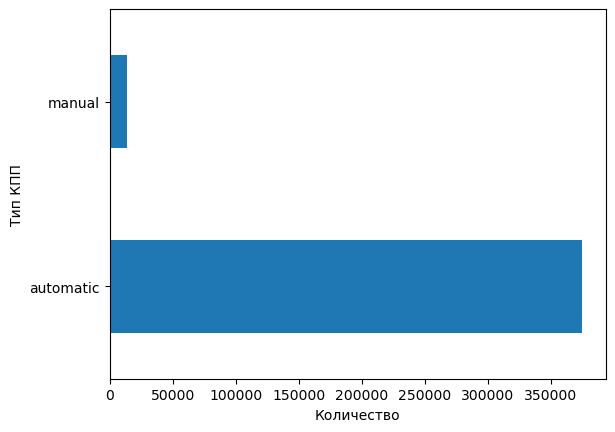

automatic    375061
manual        13714
Name: transmission, dtype: int64

In [39]:
df['transmission'].value_counts().plot.barh()
plt.xlabel('Количество')
plt.ylabel('Тип КПП')
plt.show()
df['transmission'].value_counts()

Автоматов значительно больше чем ручных коробок

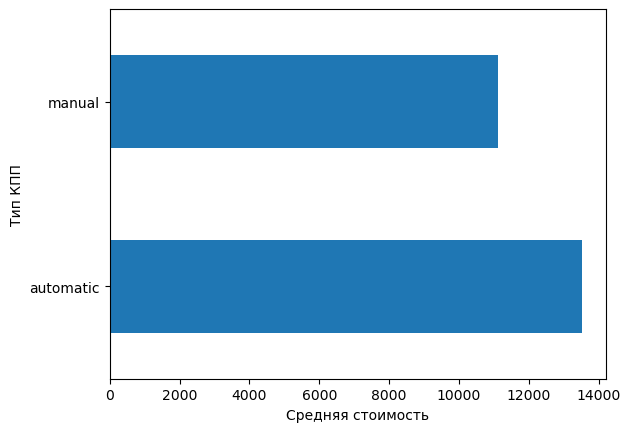

In [40]:
df.groupby('transmission')['sellingprice'].agg(['count', 'mean']).sort_values('count', ascending=False)['mean'].plot.barh()
plt.xlabel('Средняя стоимость')
plt.ylabel('Тип КПП')
plt.show()

Средняя стоимость авто с автоматом немного выше

### State

In [41]:
len(df['state'].unique())

38

Представлено большинство штатов

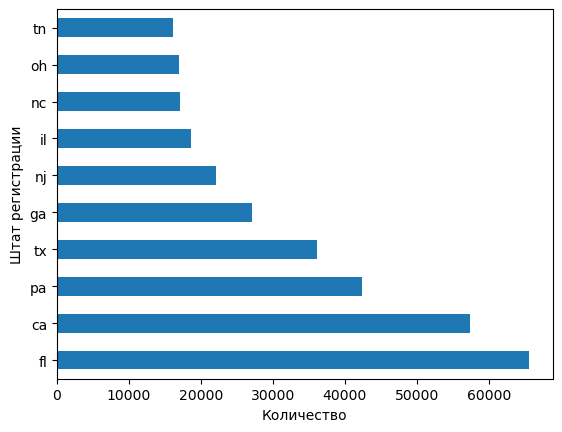

fl    65618
ca    57407
pa    42462
tx    36104
ga    27141
nj    22102
il    18651
nc    17051
oh    16959
tn    16156
Name: state, dtype: int64

In [42]:
df['state'].value_counts()[:10].plot.barh()
plt.xlabel('Количество')
plt.ylabel('Штат регистрации')
plt.show()
df['state'].value_counts()[:10]

Продажи по штатам распределены неравномерно

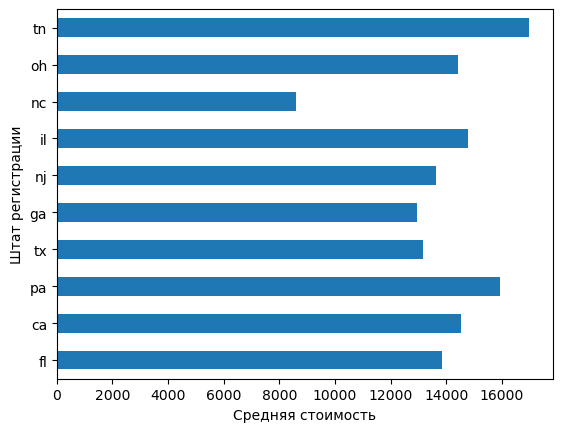

In [43]:
df.groupby('state')['sellingprice'].agg(['count', 'mean']).sort_values('count', ascending=False)[:10]['mean'].plot.barh()
plt.xlabel('Средняя стоимость')
plt.ylabel('Штат регистрации')
plt.show()

В зависимости от штата меняется средняя стоимость

### Color

In [44]:
len(df['color'].unique())

21

Представлен 21 цвет кузова

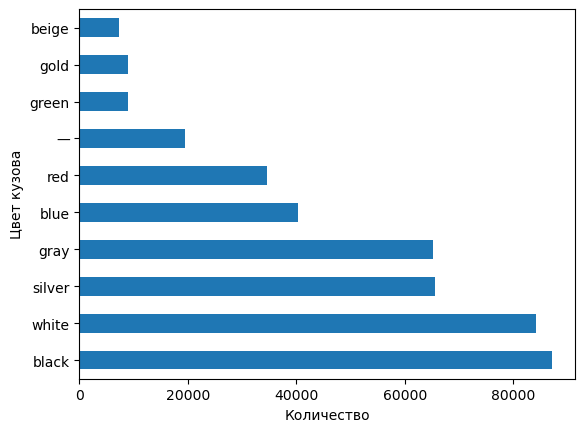

black     87115
white     84149
silver    65667
gray      65284
blue      40237
red       34514
—         19520
green      8975
gold       8934
beige      7257
Name: color, dtype: int64

In [45]:
df['color'].value_counts()[:10].plot.barh()
plt.xlabel('Количество')
plt.ylabel('Цвет кузова')
plt.show()
df['color'].value_counts()[:10]

Преобладают черный, белый, серебряный и серый, также много прочерков, цвет не указан.

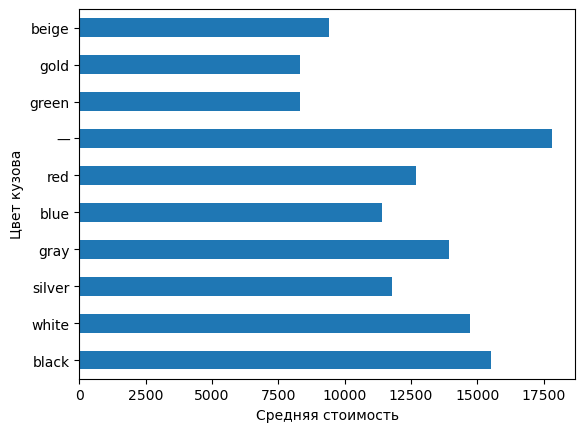

In [46]:
df.groupby('color')['sellingprice'].agg(['count', 'mean']).sort_values('count', ascending=False)[:10]['mean'].plot.barh()
plt.xlabel('Средняя стоимость')
plt.ylabel('Цвет кузова')
plt.show()

Есть зависимость стоимости от цвета, в преобладающих черном и белом цвете средняя стоимость наивысшая, для менее популярных цветов цена ниже. Интересно, что наибольшая средняя стоимость для авто с неуказанным цветом

### Interior

In [47]:
len(df['interior'].unique())

18

Представлено 18 цветов интерьера

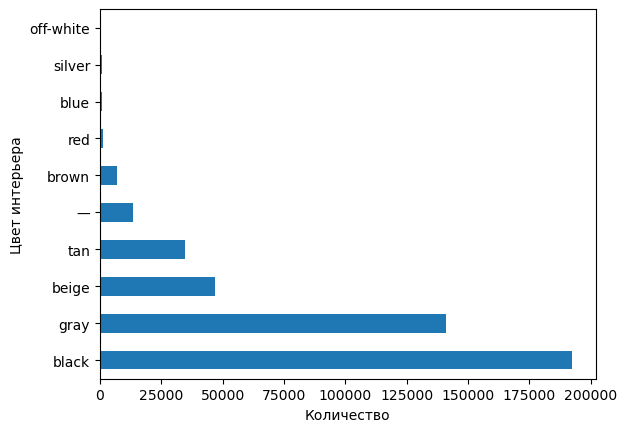

black        192442
gray         140843
beige         46878
tan           34709
—             13563
brown          6818
red            1070
blue            885
silver          844
off-white       373
Name: interior, dtype: int64

In [48]:
df['interior'].value_counts()[:10].plot.barh()
plt.xlabel('Количество')
plt.ylabel('Цвет интерьера')
plt.show()
df['interior'].value_counts()[:10]

Интерьер обычно черный или серый, также немало прочерков.

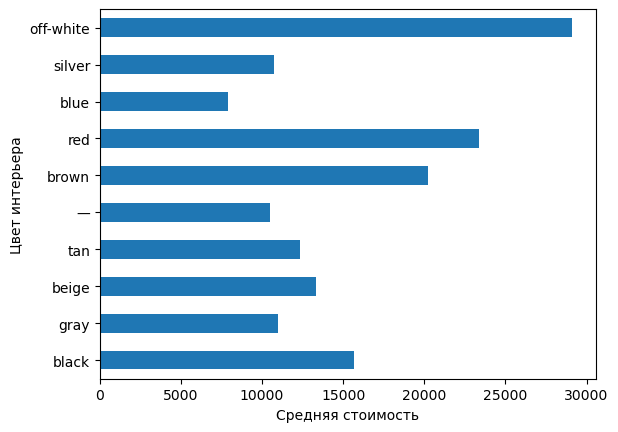

In [49]:
df.groupby('interior')['sellingprice'].agg(['count', 'mean']).sort_values('count', ascending=False)[:10]['mean'].plot.barh()
plt.xlabel('Средняя стоимость')
plt.ylabel('Цвет интерьера')
plt.show()

Для разных цветов интерьера стоимость может значитально отличаться, возможно это зависит от того, что некоторые интерьеры сделаны из дорогих материалов, которые обычно используются в дорогих авто.

### Seller

In [50]:
len(df['seller'].unique())

13025

Очень большое число различных продавцов

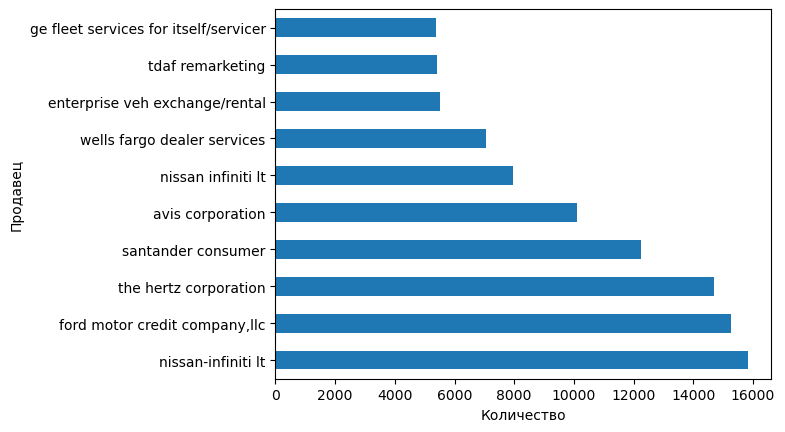

nissan-infiniti lt                       15823
ford motor credit company,llc            15276
the hertz corporation                    14692
santander consumer                       12230
avis corporation                         10098
nissan infiniti lt                        7964
wells fargo dealer services               7061
enterprise veh exchange/rental            5516
tdaf remarketing                          5404
ge fleet services for itself/servicer     5368
Name: seller, dtype: int64

In [51]:
df['seller'].value_counts()[:10].plot.barh()
plt.xlabel('Количество')
plt.ylabel('Продавец')
plt.show()
df['seller'].value_counts()[:10]

Топ 10 продавцов
* nissan-infiniti lt                       15823
* ford motor credit company,llc            15276
* the hertz corporation                    14692
* santander consumer                       12230
* avis corporation                         10098
* nissan infiniti lt                        7964
* wells fargo dealer services               7061
* enterprise veh exchange/rental            5516
* tdaf remarketing                          5404
* ge fleet services for itself/servicer     5368

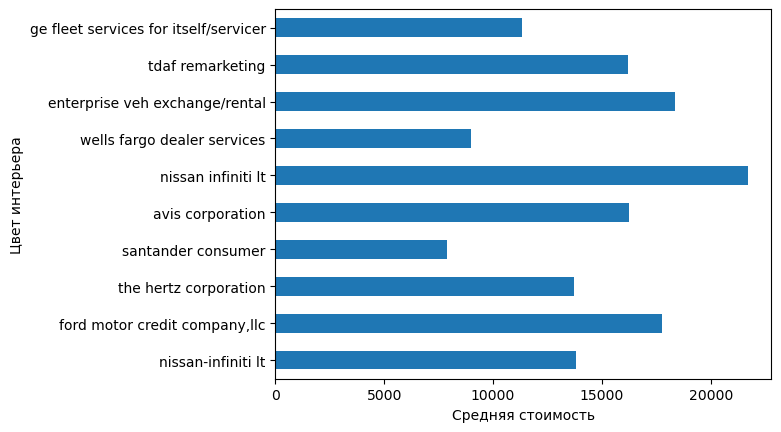

In [52]:
df.groupby('seller')['sellingprice'].agg(['count', 'mean']).sort_values('count', ascending=False)[:10]['mean'].plot.barh()
plt.xlabel('Средняя стоимость')
plt.ylabel('Цвет интерьера')
plt.show()

Средняя стоимость сильно зависит от продавца.

# Предварительная обработка

## condition и odometer

Заменим пропуски в данных признаках методом ближайших соседей

In [53]:
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")
num_columns = ['condition', 'odometer']
df[num_columns] = knn_imputer.fit_transform(df[num_columns])
df_test[num_columns] = knn_imputer.transform(df_test[num_columns])

In [54]:
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer
#
# mice_imputer = IterativeImputer()
# num_columns = ['condition', 'odometer']
# df[num_columns] = mice_imputer.fit_transform(df[num_columns])
# df_test[num_columns] = mice_imputer.transform(df_test[num_columns])

## Пропуски в категориальных признаках

Заполняем пропуски на UNKNOWN, тип КПП обработаем отдельно

In [55]:
categorical_features = ['make','model', 'trim', 'body', 'state', 'color', 'interior', 'seller']

In [56]:
df[categorical_features] = df[categorical_features].fillna(UNKNOWN)
df_test[categorical_features] = df_test[categorical_features].fillna(UNKNOWN)

## Неявные дубликаты

### make

Посмотрим на уникальные значения производителя

In [57]:
df['make'].sort_values().unique()

array(['UNKNOWN', 'acura', 'airstream', 'aston martin', 'audi', 'bentley',
       'bmw', 'buick', 'cadillac', 'chevrolet', 'chrysler', 'daewoo',
       'dodge', 'dodge tk', 'dot', 'ferrari', 'fiat', 'fisker', 'ford',
       'ford truck', 'geo', 'gmc', 'gmc truck', 'honda', 'hummer',
       'hyundai', 'infiniti', 'isuzu', 'jaguar', 'jeep', 'kia',
       'lamborghini', 'land rover', 'landrover', 'lexus', 'lincoln',
       'maserati', 'mazda', 'mazda tk', 'mercedes', 'mercedes-b',
       'mercedes-benz', 'mercury', 'mini', 'mitsubishi', 'nissan',
       'oldsmobile', 'plymouth', 'pontiac', 'porsche', 'ram',
       'rolls-royce', 'saab', 'saturn', 'scion', 'smart', 'subaru',
       'suzuki', 'tesla', 'toyota', 'volkswagen', 'volvo', 'vw'],
      dtype=object)

Заменим неявные дубликаты вручную

In [58]:
make_replace  = {
    'dodge tk': 'dodge',
    'landrover': 'land rover',
    'mazda tk': 'mazda',
    'mercedes': 'mercedes-benz',
    'mercedes-b': 'mercedes-benz',
    'vw': 'volkswagen',
}
df['make'] = df['make'].replace(make_replace)
df_test['make'] = df_test['make'].replace(make_replace)

### model

Посмотрим на уникальные значения модели

In [59]:
len(df['model'].sort_values().unique())

840

Различны моделей очень много, вручную найти в них дубликаты затруднительно

### trim

Посмотрим на уникальные значения модификации

In [60]:
len(df['trim'].sort_values().unique())

1851

Различных модификаций еще больше чем моделей, обработать вручную крайне затруднительно. Возможно стоит заменить пропуски на самую распространенную базовую модификацию - base

In [61]:
df['trim'] = df['trim'].replace({UNKNOWN.lower(): 'base'})
df_test['trim'] = df_test['trim'].replace({UNKNOWN.lower(): 'base'})

### body

Посмотрим на уникальные значения типа кузова

In [62]:
df['body'].sort_values().unique()

array(['UNKNOWN', 'access cab', 'beetle convertible', 'cab plus',
       'cab plus 4', 'club cab', 'convertible', 'coupe', 'crew cab',
       'crewmax cab', 'cts coupe', 'cts wagon', 'cts-v coupe',
       'cts-v wagon', 'double cab', 'e-series van', 'elantra coupe',
       'extended cab', 'g convertible', 'g coupe', 'g sedan',
       'g37 convertible', 'g37 coupe', 'genesis coupe',
       'granturismo convertible', 'hatchback', 'king cab', 'koup',
       'mega cab', 'minivan', 'promaster cargo van', 'q60 convertible',
       'q60 coupe', 'quad cab', 'ram van', 'regular cab', 'regular-cab',
       'sedan', 'supercab', 'supercrew', 'suv', 'transit van',
       'tsx sport wagon', 'van', 'wagon', 'xtracab'], dtype=object)

Заменим неявные дубликаты вручную

In [63]:
body_replace  = {
    'cts coupe': 'coupe',
    'cts wagon': 'wagon',
    'cts-v coupe': 'coupe',
    'cts-v wagon': 'wagon',
    'e-series van': 'van',
    'g convertible': 'convertible',
    'g coupe': 'coupe',
    'g sedan': 'sedan',
    'g37 convertible': 'convertible',
    'g37 coupe': 'coupe',
    'genesis coupe': 'coupe',
    'granturismo convertible': 'convertible',
    'koup': 'coupe',
    'promaster cargo van': 'van',
    'q60 convertible': 'convertible',
    'q60 coupe': 'coupe',
    'regular-cab': 'regular cab',
    'transit van': 'van',
    'tsx sport wagon': 'wagon',
    'ram van': 'van',
    'beetle convertible': 'convertible'
}
df['body'] = df['body'].replace(body_replace)
df_test['body'] = df_test['body'].replace(body_replace)

### color

Посмотрим на уникальные значения цвета кузова

In [64]:
df['color'].value_counts()

black        87115
white        84149
silver       65667
gray         65284
blue         40237
red          34514
—            19520
green         8975
gold          8934
beige         7257
burgundy      7059
brown         5320
orange        1629
purple        1250
off-white     1143
yellow         979
UNKNOWN        586
charcoal       389
turquoise      183
pink            32
lime            14
Name: color, dtype: int64

Заменим '-' на UNKNOWN

In [65]:
df['color'] = df['color'].replace({'—': UNKNOWN})
df_test['color'] = df_test['color'].replace({'—': UNKNOWN})

### interior

Посмотрим на уникальные значения цвета интерьера

In [66]:
df['interior'].value_counts()

black        192442
gray         140843
beige         46878
tan           34709
—             13563
brown          6818
red            1070
blue            885
silver          844
UNKNOWN         586
off-white       373
purple          276
gold            256
white           215
green           198
burgundy        155
orange          109
yellow           16
Name: interior, dtype: int64

Заменим '-' на UNKNOWN

In [67]:
df['interior'] = df['interior'].replace({'—': UNKNOWN})
df_test['interior'] = df_test['interior'].replace({'—': UNKNOWN})

### seller

Посмотрим на уникальные значения продавца

In [68]:
len(df['seller'].sort_values().unique())

13025

In [69]:
df['seller'].value_counts().head(50)

nissan-infiniti lt                                    15823
ford motor credit company,llc                         15276
the hertz corporation                                 14692
santander consumer                                    12230
avis corporation                                      10098
nissan infiniti lt                                     7964
wells fargo dealer services                            7061
enterprise veh exchange/rental                         5516
tdaf remarketing                                       5404
ge fleet services for itself/servicer                  5368
hyundai motor finance                                  5292
jpmorgan chase bank,n.a.                               4989
ahfc/honda lease trust/hvt, inc. eot                   4854
financial services remarketing (lease)                 4734
mercedes-benz financial services                       4490
chrysler capital                                       4478
gm financial                            

Очень большое число продавцов, попробуем убрать из значение различные символы, запятые и т.д.

In [70]:
df['seller'] = df['seller'].str.replace('-', ' ', regex=False)
df['seller'] = df['seller'].str.replace('/', ' ', regex=False)
df['seller'] = df['seller'].str.replace(',', ' ', regex=False)
df['seller'] = df['seller'].str.replace('.', ' ', regex=False)
df['seller'] = df['seller'].str.replace('(', ' ', regex=False)
df['seller'] = df['seller'].str.replace(')', ' ', regex=False)
df['seller'] = df['seller'].str.replace('   ', ' ', regex=False)
df['seller'] = df['seller'].str.replace('  ', ' ', regex=False)

df_test['seller'] = df_test['seller'].str.replace('-', ' ', regex=False)
df_test['seller'] = df_test['seller'].str.replace('/', ' ', regex=False)
df_test['seller'] = df_test['seller'].str.replace(',', ' ', regex=False)
df_test['seller'] = df_test['seller'].str.replace('.', ' ', regex=False)
df_test['seller'] = df_test['seller'].str.replace('(', ' ', regex=False)
df_test['seller'] = df_test['seller'].str.replace(')', ' ', regex=False)
df_test['seller'] = df_test['seller'].str.replace('   ', ' ', regex=False)
df_test['seller'] = df_test['seller'].str.replace('  ', ' ', regex=False)

### Модель предсказания КПП

In [71]:
from catboost import CatBoostClassifier
df_trans = df[df['transmission'].notna()]
df_trans = df_trans.drop(columns=['sellingprice', 'vin'])
clf = CatBoostClassifier(task_type='GPU')
# clf = CatBoostClassifier()
categorical_features_trans = categorical_features.copy()

In [72]:
trans_pool = Pool(df_trans.drop(columns=['transmission', 'saledate', 'saledate_dt']), df_trans['transmission'], cat_features=categorical_features_trans)

In [73]:
clf.fit(trans_pool, verbose=100)

Learning rate set to 0.024285
0:	learn: 0.6448481	total: 42.2ms	remaining: 42.2s
100:	learn: 0.1019906	total: 4.55s	remaining: 40.5s
200:	learn: 0.0968981	total: 8.69s	remaining: 34.5s
300:	learn: 0.0950779	total: 13.2s	remaining: 30.7s
400:	learn: 0.0939839	total: 18.3s	remaining: 27.3s
500:	learn: 0.0931868	total: 22.8s	remaining: 22.7s
600:	learn: 0.0925525	total: 27.4s	remaining: 18.2s
700:	learn: 0.0919638	total: 31.6s	remaining: 13.5s
800:	learn: 0.0914483	total: 36.2s	remaining: 9s
900:	learn: 0.0909906	total: 40.5s	remaining: 4.45s
999:	learn: 0.0905360	total: 44.7s	remaining: 0us


In [74]:
df_no_trans = df[df['transmission'].isna()]
df_test_no_trans = df_test[df_test['transmission'].isna()]

df_no_trans = df_no_trans.drop(columns=['sellingprice', 'vin', 'transmission', 'saledate', 'saledate_dt'])
df_test_no_trans = df_test_no_trans.drop(columns=['vin', 'transmission', 'saledate', 'saledate_dt'])

In [75]:
df_no_trans_predict = clf.predict(df_no_trans)
df_test_no_trans_predict = clf.predict(df_test_no_trans)

In [76]:
df['transmission'][df['transmission'].isna()] = df_no_trans_predict
df_test['transmission'][df_test['transmission'].isna()] = df_test_no_trans_predict

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# Разработка новых синтетических признаков

Нагенерируем различные комбинации категориальных призаков для сочетания производителя, марки, модификации и кузова. Для числовых признаков выделим отношения одного признака к другому, также выделим возраст автомобиля

In [77]:
df['condition_div_by_odometer'] = df['condition'] / df['odometer']
df_test['condition_div_by_odometer'] = df_test['condition'] / df_test['odometer']

In [78]:
df['age'] = df['sale_year'] - df['year']
df_test['age'] = df_test['sale_year'] - df_test['year']

In [79]:
df['condition_div_by_age'] = df['condition'] / df['age']
df_test['condition_div_by_age'] = df_test['condition'] / df_test['age']

In [80]:
df['odometer_div_by_age'] = df['odometer'] / df['age']
df_test['odometer_div_by_age'] = df_test['odometer'] / df_test['age']

In [81]:
df['make_model'] = df['make'] + df['model']
df_test['make_model'] = df_test['make'] + df_test['model']

In [82]:
df['model_trim'] = df['model'] + df['trim']
df_test['model_trim'] = df_test['model'] + df_test['trim']

In [83]:
df['model_body'] = df['model'] + df['body']
df_test['model_body'] = df_test['model'] + df_test['body']

In [84]:
df['model_trim_body'] = df['model'] + df['trim'] + df['body']
df_test['model_trim_body'] = df_test['model'] + df_test['trim'] + df_test['body']

In [85]:
df['make_model_trim_body'] = df['make'] + df['model'] + df['trim'] + df['body']
df_test['make_model_trim_body'] = df_test['make'] + df_test['model'] + df_test['trim'] + df_test['body']

In [86]:
df['make_body'] = df['make'] + df['body']
df_test['make_body'] = df_test['make'] + df_test['body']

In [87]:
df['make_trim'] = df['make'] + df['trim']
df_test['make_trim'] = df_test['make'] + df_test['trim']

In [88]:
df['make_model_trim'] = df['make'] + df['model'] + df['trim']
df_test['make_model_trim'] = df_test['make'] + df_test['model'] + df_test['trim']

In [89]:
df['make_model_body'] = df['make'] + df['model'] + df['body']
df_test['make_model_body'] = df_test['make'] + df_test['model'] + df_test['body']

# Зависимость между признаками

Построим Phik-корреляцию, для ускорения построения удалим категориальные признаки с очень большим числом уникальных значений

In [90]:
columns = df.columns.to_list()
filtred_columns = []
for column in columns:
    if (df[column].dtype != 'object') or (df[column].nunique() < 1000):
        filtred_columns.append(column)

filtred_columns.remove('saledate_dt')
display(filtred_columns)

df_phik = df[filtred_columns]

['year',
 'make',
 'model',
 'body',
 'transmission',
 'state',
 'condition',
 'odometer',
 'color',
 'interior',
 'sellingprice',
 'sale_year',
 'sale_month',
 'sale_yearday',
 'sale_weekday',
 'sale_day',
 'condition_div_by_odometer',
 'age',
 'condition_div_by_age',
 'odometer_div_by_age',
 'make_model',
 'make_body']

In [91]:
phik_matrix = df_phik.phik_matrix()
phik_matrix['sellingprice'].sort_values(ascending=False)

interval columns not set, guessing: ['year', 'condition', 'odometer', 'sellingprice', 'sale_year', 'sale_month', 'sale_yearday', 'sale_weekday', 'sale_day', 'condition_div_by_odometer', 'age', 'condition_div_by_age', 'odometer_div_by_age']


/opt/conda/lib/python3.7/site-packages/numpy/core/function_base.py:151: RuntimeWarning: invalid value encountered in multiply
  y *= step


sellingprice                 1.000000
make_model                   0.875674
model                        0.872434
make_body                    0.768438
make                         0.702284
body                         0.293011
condition                    0.242706
age                          0.213744
year                         0.207426
odometer                     0.167409
interior                     0.153010
state                        0.138439
color                        0.122953
sale_month                   0.046068
sale_yearday                 0.045638
sale_weekday                 0.042197
sale_day                     0.027323
transmission                 0.014856
condition_div_by_odometer    0.008460
sale_year                         NaN
condition_div_by_age              NaN
odometer_div_by_age               NaN
Name: sellingprice, dtype: float64

На стоимость больше всего влияют производитель+модель, модель, производитель+кузов, производитель, кузов, состояние, возраст, год производства. Данные предварительные, окончательно на них пологаться не стоит

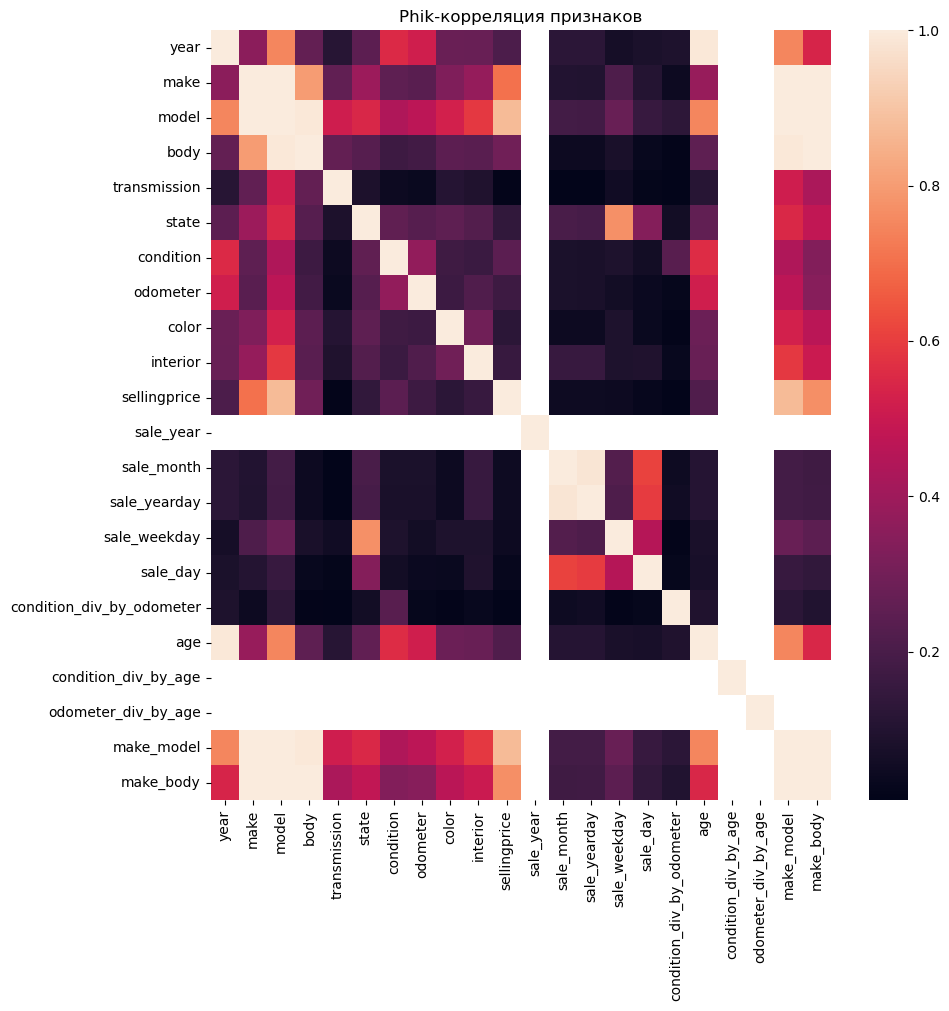

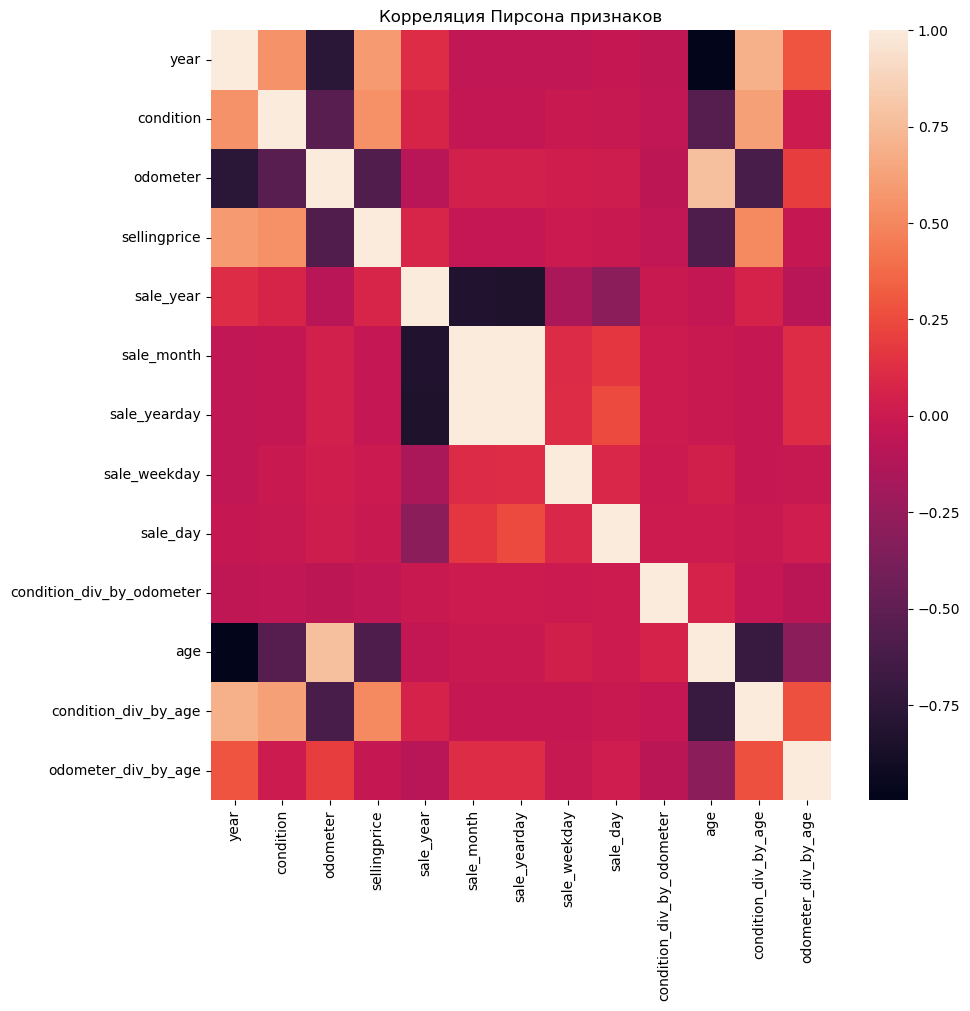

In [92]:
plt.figure(figsize=(10, 10))
sns.heatmap(phik_matrix).set(title='Phik-корреляция признаков')
plt.show()
plt.figure(figsize=(10, 10))
sns.heatmap(df_phik.corr()).set(title='Корреляция Пирсона признаков')
plt.show()

Есть зависимость между производителем, моделью и модификаций. Это логично, так как по сути определенная модель есть только у определенного произодителя и у этой модели могут быть какие-то модификации. Также коррелируют месяц и день года, день года попадает в конкретный месяц.

# Отбор признаков

Уберем коррелирующие признаки, день недели и день месяца определим как категориальные, не будем добавлять день года и месяц, удалим модель модификацию и кузов, они присутствуют в синтетических признаках

In [93]:
numerical_features = ['year', 'odometer', 'condition', 'condition_div_by_odometer', 'age', 'condition_div_by_age', 'odometer_div_by_age', 'sale_year']

categorical_features.append("sale_weekday")
categorical_features.append("sale_day")
categorical_features.append("make_model")
categorical_features.append("make_body")
categorical_features.append("make_trim")
categorical_features.append("make_model_trim")
categorical_features.append("make_model_body")
categorical_features.append("make_model_trim_body")

categorical_features.remove('model')

features = categorical_features + numerical_features

features

['make',
 'trim',
 'body',
 'state',
 'color',
 'interior',
 'seller',
 'sale_weekday',
 'sale_day',
 'make_model',
 'make_body',
 'make_trim',
 'make_model_trim',
 'make_model_body',
 'make_model_trim_body',
 'year',
 'odometer',
 'condition',
 'condition_div_by_odometer',
 'age',
 'condition_div_by_age',
 'odometer_div_by_age',
 'sale_year']

In [94]:
target = 'sellingprice'

In [95]:
features_train = df[features]
target_train = df[target]
features_test = df_test[features]

# Обучение модели

В результате множется попыток перебора, экспериментов, грид серча удалось подобрать оптимальные гиперпараметры

In [96]:
train_dataset = Pool(features_train, target_train, cat_features=categorical_features)

In [97]:
params = {
    'iterations': 5000,
    'learning_rate':  0.06,
    'depth': 10,
    'l2_leaf_reg': 9,
    'loss_function': 'RMSE',
    'eval_metric': 'MAPE',
    'cat_features': categorical_features,
    'random_seed': RANDOM_STATE,
    'verbose': 100,
    'early_stopping_rounds': 300,
    'task_type': 'GPU'
}


model = CatBoostRegressor(**params)
model.fit(train_dataset)

0:	learn: 1.7827181	total: 101ms	remaining: 8m 25s
100:	learn: 0.2606229	total: 9.73s	remaining: 7m 51s
200:	learn: 0.2271314	total: 18.3s	remaining: 7m 16s
300:	learn: 0.2152227	total: 26.6s	remaining: 6m 55s
400:	learn: 0.2072572	total: 35.2s	remaining: 6m 43s
500:	learn: 0.2012757	total: 44.6s	remaining: 6m 40s
600:	learn: 0.1974877	total: 53.1s	remaining: 6m 28s
700:	learn: 0.1942640	total: 1m 1s	remaining: 6m 17s
800:	learn: 0.1912494	total: 1m 10s	remaining: 6m 9s
900:	learn: 0.1892370	total: 1m 19s	remaining: 5m 59s
1000:	learn: 0.1861655	total: 1m 27s	remaining: 5m 50s
1100:	learn: 0.1839199	total: 1m 36s	remaining: 5m 41s
1200:	learn: 0.1822251	total: 1m 45s	remaining: 5m 34s
1300:	learn: 0.1804663	total: 1m 54s	remaining: 5m 24s
1400:	learn: 0.1783639	total: 2m 2s	remaining: 5m 15s
1500:	learn: 0.1768863	total: 2m 11s	remaining: 5m 7s
1600:	learn: 0.1755320	total: 2m 20s	remaining: 4m 59s
1700:	learn: 0.1736779	total: 2m 29s	remaining: 4m 50s
1800:	learn: 0.1726746	total: 2m 

In [98]:
model.get_best_score()

{'learn': {'MAPE': 0.14113850298476271, 'RMSE': 1300.9479075936827}}

In [99]:
model.save_model('used_cars_light.cbm')

# Важность признаков

In [100]:
feature_importance = model.get_feature_importance(prettified=True)
feature_importance

,Feature Id,Importances
0,condition_div_by_odometer,14.654821
1,make,12.547555
2,make_model,10.450513
3,condition_div_by_age,9.694330
4,body,6.997504
5,year,6.663828
6,make_body,5.473798
7,make_model_trim,5.089355
8,make_model_body,4.366554
9,make_trim,4.170129


Интересно, что большое влияние оказывает синтетический признак отношение состояния к пробегу, также хорошо себя показывает объединение производителя и модели в один признак и отношение состояния к возрасту. За счет этих призаков сам пробег и состояние ушли на второй план.

# Предсказание

In [101]:
predict = model.predict(features_test)
submission = pd.DataFrame({'vin': df_test['vin'], 'sellingprice': predict})
submission.to_csv('submission.csv', index=False)

# Выводы

В ходе работы был изучен датасет по продажам автомобилей на вторичном рынке и построена модель предсказания цены автомобиля для участия в соревновании на kaggle.  Применены различные техники предобработки данных. Также были разработано множество синтетических признаков, как числовых, так и категориальных. Большое количество времени было затрачено на отбор финальных признаков, которые будут использоваться для обучения модели и подбор оптимальных гиперпарамертов модели.

В самых первых итерациях экспериментов была использована линейная модель, показавшая на необработанных данных метрику MAPE порядка 60%. Значение показалось довольно плохим и от использования в дальнейшем этой модели было решено отказаться и сосредоточиться на градиентном бустинге catboost. Также в ходе экспериментов была использована automl библиотека mlbox, которая позволила без каких либо предобработок и подбора параметров получить значение метрики 26%. Данное значение можно было считать базовым, от него можно было отталкиваться при дальнейшей ручной работе.

В итоге на публичном тестовом датасете была достигнута метрика MAPE 13.83%. Однако на приватной части датасета у всех участников соревнования значение метрики заметно ухудшилось, данная работа получила 49.6%. Тем не менее данный результат позволил занять второе место в соревновани и получить большой опыт как участия в соревнованиях, так и работы датасаентиста.

Также обученная модель была использована для создания веб-приложения, позволяющего по заданным параметрам получить предсказание цены автомобиля.
https://github.com/dmtrbrlkv/streamlit-used-cars-price-prediction/
https://dmtrbrlkv-used-cars-price-prediction.streamlit.app